In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [70]:
df = pd.read_csv('Search_keyword_report.csv', skiprows=2)

In [71]:
df.head()

,Keyword status,Keyword,Match type,Status,Status reasons,Conversions,Currency code,Cost / conv.,Final URL,Mobile final URL,Clicks,Impr.,CTR,Avg. CPC,Cost,Conv. rate
0,Enabled,"""gym membership""",Phrase match,Eligible,NaN,0.0,USD,0.00,NaN,NaN,2,8,25.00%,0.37,0.75,0.00%
1,Enabled,"""fitness gyms near me""",Phrase match,Eligible,NaN,0.0,USD,0.00,NaN,NaN,2,8,25.00%,0.60,1.19,0.00%
2,Enabled,"""Freehold gym""",Phrase match,Eligible,NaN,17.0,USD,3.78,NaN,NaN,110,335,32.84%,0.58,64.24,15.45%
3,Enabled,"""workout classes near me""",Phrase match,Eligible,NaN,0.0,USD,0.00,NaN,NaN,0,0,--,0.00,0.00,0.00%
4,Enabled,"""gyms near me""",Phrase match,Eligible,NaN,8.0,USD,7.34,NaN,NaN,117,770,15.19%,0.50,58.75,6.84%


In [72]:
# Clean column names
df.columns = [col.strip() for col in df.columns]

In [73]:
df

,Keyword status,Keyword,Match type,Status,Status reasons,Conversions,Currency code,Cost / conv.,Final URL,Mobile final URL,Clicks,Impr.,CTR,Avg. CPC,Cost,Conv. rate
0,Enabled,"""gym membership""",Phrase match,Eligible,NaN,0.0,USD,0.00,NaN,NaN,2,8,25.00%,0.37,0.75,0.00%
1,Enabled,"""fitness gyms near me""",Phrase match,Eligible,NaN,0.0,USD,0.00,NaN,NaN,2,8,25.00%,0.60,1.19,0.00%
2,Enabled,"""Freehold gym""",Phrase match,Eligible,NaN,17.0,USD,3.78,NaN,NaN,110,335,32.84%,0.58,64.24,15.45%
3,Enabled,"""workout classes near me""",Phrase match,Eligible,NaN,0.0,USD,0.00,NaN,NaN,0,0,--,0.00,0.00,0.00%
4,Enabled,"""gyms near me""",Phrase match,Eligible,NaN,8.0,USD,7.34,NaN,NaN,117,770,15.19%,0.50,58.75,6.84%
5,Enabled,fitness,Broad match,Eligible,NaN,0.0,USD,0.00,NaN,NaN,8,88,9.09%,0.44,3.55,0.00%
6,Enabled,gym,Broad match,Eligible,NaN,173.0,USD,4.95,NaN,NaN,"1,771","9,362",18.92%,0.48,856.86,9.77%
7,Enabled,"""fitness clubs near me""",Phrase match,Eligible,NaN,0.0,USD,0.00,NaN,NaN,2,15,13.33%,0.46,0.93,0.00%
8,Enabled,gym near me,Broad match,Eligible,NaN,17.0,USD,6.95,NaN,NaN,236,"1,440",16.39%,0.50,118.19,7.20%
9,Enabled,"""workout gyms near me""",Phrase match,Eligible,NaN,0.0,USD,0.00,NaN,NaN,0,1,0.00%,0.00,0.00,0.00%


In [74]:
#Fix formatting issue by replacing '--' with 0 
columns_to_clean = ['CTR']
for col in columns_to_clean:
    df[col] = df[col].replace(' --', '0').replace('--', '0')

In [75]:
df

,Keyword status,Keyword,Match type,Status,Status reasons,Conversions,Currency code,Cost / conv.,Final URL,Mobile final URL,Clicks,Impr.,CTR,Avg. CPC,Cost,Conv. rate
0,Enabled,"""gym membership""",Phrase match,Eligible,NaN,0.0,USD,0.00,NaN,NaN,2,8,25.00%,0.37,0.75,0.00%
1,Enabled,"""fitness gyms near me""",Phrase match,Eligible,NaN,0.0,USD,0.00,NaN,NaN,2,8,25.00%,0.60,1.19,0.00%
2,Enabled,"""Freehold gym""",Phrase match,Eligible,NaN,17.0,USD,3.78,NaN,NaN,110,335,32.84%,0.58,64.24,15.45%
3,Enabled,"""workout classes near me""",Phrase match,Eligible,NaN,0.0,USD,0.00,NaN,NaN,0,0,0,0.00,0.00,0.00%
4,Enabled,"""gyms near me""",Phrase match,Eligible,NaN,8.0,USD,7.34,NaN,NaN,117,770,15.19%,0.50,58.75,6.84%
5,Enabled,fitness,Broad match,Eligible,NaN,0.0,USD,0.00,NaN,NaN,8,88,9.09%,0.44,3.55,0.00%
6,Enabled,gym,Broad match,Eligible,NaN,173.0,USD,4.95,NaN,NaN,"1,771","9,362",18.92%,0.48,856.86,9.77%
7,Enabled,"""fitness clubs near me""",Phrase match,Eligible,NaN,0.0,USD,0.00,NaN,NaN,2,15,13.33%,0.46,0.93,0.00%
8,Enabled,gym near me,Broad match,Eligible,NaN,17.0,USD,6.95,NaN,NaN,236,"1,440",16.39%,0.50,118.19,7.20%
9,Enabled,"""workout gyms near me""",Phrase match,Eligible,NaN,0.0,USD,0.00,NaN,NaN,0,1,0.00%,0.00,0.00,0.00%


In [76]:
#Convert numeric columns after cleaning formatting issues
df['CTR'] = df['CTR'].astype(str).replace(' --', '0').str.replace('%', '', regex=False).astype(float)
df['Cost / conv.'] = df['Cost / conv.'].astype(str).replace(' --', '0').str.replace('$', '', regex=False).astype(float)
df['Conversions'] = pd.to_numeric(df['Conversions'].astype(str).replace(' --', '0'), errors='coerce')
df['Clicks'] = pd.to_numeric(df['Clicks'].astype(str).replace(' --', '0'), errors='coerce')
df['Impr.'] = pd.to_numeric(df['Impr.'].astype(str).replace(' --', '0'), errors='coerce')
df['Cost'] = pd.to_numeric(df['Cost'].astype(str).replace(' --', '0'), errors='coerce')

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Keyword status    10 non-null     object 
 1   Keyword           10 non-null     object 
 2   Match type        12 non-null     object 
 3   Status            10 non-null     object 
 4   Status reasons    0 non-null      float64
 5   Conversions       12 non-null     float64
 6   Currency code     12 non-null     object 
 7   Cost / conv.      12 non-null     float64
 8   Final URL         0 non-null      float64
 9   Mobile final URL  0 non-null      float64
 10  Clicks            9 non-null      float64
 11  Impr.             8 non-null      float64
 12  CTR               12 non-null     float64
 13  Avg. CPC          12 non-null     float64
 14  Cost              12 non-null     float64
 15  Conv. rate        12 non-null     object 
dtypes: float64(10), object(6)
memory usage: 1.6+ K

In [78]:
#Handle missing values
df.fillna(0, inplace=True)

In [80]:
#Summary metrics
total_clicks = df['Clicks'].sum()
total_impressions = df['Impr.'].sum()
overall_ctr = (total_clicks / total_impressions) * 100 if total_impressions > 0 else 0
total_conversions = df['Conversions'].sum()
total_cost = df['Cost'].sum()
cost_per_conversion = (total_cost / total_conversions) if total_conversions > 0 else 0

In [91]:
#Print summary metrics
print("Keyword 'Gym' Campaign Summary (2.5 months since opening)")
print('--------------------------------------------------------')
print(f"Total Clicks: {total_clicks}")
print(f"Total Impressions: {total_impressions}")
print(f"Overall CTR: {overall_ctr:.2f}%")
print(f"Total Conversions: {total_conversions}")
print(f"Cost per Conversion: ${cost_per_conversion:.2f}")

Keyword 'Gym' Campaign Summary (2.5 months since opening)
--------------------------------------------------------
Total Clicks: 477.0
Total Impressions: 1225.0
Overall CTR: 38.94%
Total Conversions: 645.0
Cost per Conversion: $5.14


In [82]:
#Top 5 keywords by clicks
top_5_keywords = df.sort_values(by='Clicks', ascending=False).head(5)
top_5_keywords

,Keyword status,Keyword,Match type,Status,Status reasons,Conversions,Currency code,Cost / conv.,Final URL,Mobile final URL,Clicks,Impr.,CTR,Avg. CPC,Cost,Conv. rate
8,Enabled,gym near me,Broad match,Eligible,0.0,17.0,USD,6.95,0.0,0.0,236.0,0.0,16.39,0.50,118.19,7.20%
4,Enabled,"""gyms near me""",Phrase match,Eligible,0.0,8.0,USD,7.34,0.0,0.0,117.0,770.0,15.19,0.50,58.75,6.84%
2,Enabled,"""Freehold gym""",Phrase match,Eligible,0.0,17.0,USD,3.78,0.0,0.0,110.0,335.0,32.84,0.58,64.24,15.45%
5,Enabled,fitness,Broad match,Eligible,0.0,0.0,USD,0.00,0.0,0.0,8.0,88.0,9.09,0.44,3.55,0.00%
0,Enabled,"""gym membership""",Phrase match,Eligible,0.0,0.0,USD,0.00,0.0,0.0,2.0,8.0,25.00,0.37,0.75,0.00%


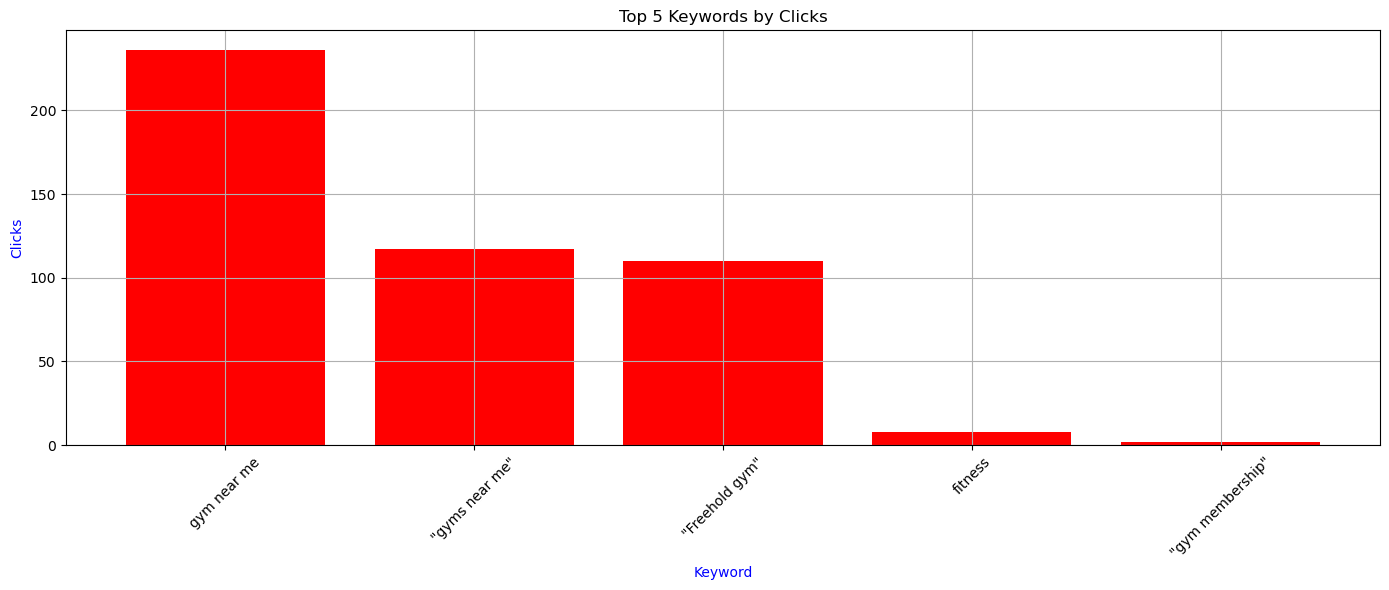

In [92]:
#Plot clicks for top 5 keywords
fig, ax1 = plt.subplots(figsize=(14, 6))
ax1.bar(top_5_keywords['Keyword'], top_5_keywords['Clicks'], color='red', label='Clicks')
ax1.set_ylabel('Clicks', color='blue')
ax1.set_xlabel('Keyword', color='blue')
ax1.tick_params(axis='x', rotation=45)

plt.title('Top 5 Keywords by Clicks')
fig.tight_layout()
plt.grid(True)
plt.show()